In [1]:
import re
import networkx as nx
from networkx.readwrite import json_graph
from fourlang.text_to_4lang import TextTo4lang
from fourlang.lexicon import Lexicon
from graphviz import Source
from scripts.parse_data import read
from scripts.check_output import compare_graphs

In [2]:
data_frame = read("en", graded=False)

In [3]:
index = 2
premise = data_frame.premise[index]
hypothesis = data_frame.hypothesis[index]
score = data_frame.score[index]

In [4]:
text_to_4lang_en = TextTo4lang(lang="en", port=5005)

In [5]:
def asim_jac_nodes(graph_premise, graph_hypothesis):
    prem = set(graph_premise.get_nodes())
    hyp = set(graph_hypothesis.get_nodes())
    sim = hyp & prem
    print(sim)
    if not sim or len(hyp) == 0:
        return 0
    else:
        return float(len(sim)) / len(hyp)

In [6]:
text_to_4lang_en.get_definition("antler")

'A branching and bony structure on the head of deer, moose and elk, normally in pairs. They are grown and shed each year. (Compare with horn, which is generally not shed.)'

In [7]:
premise = text_to_4lang_en.process_text("antler", True, 3)
hyp = text_to_4lang_en.process_text("deer",True, 1)

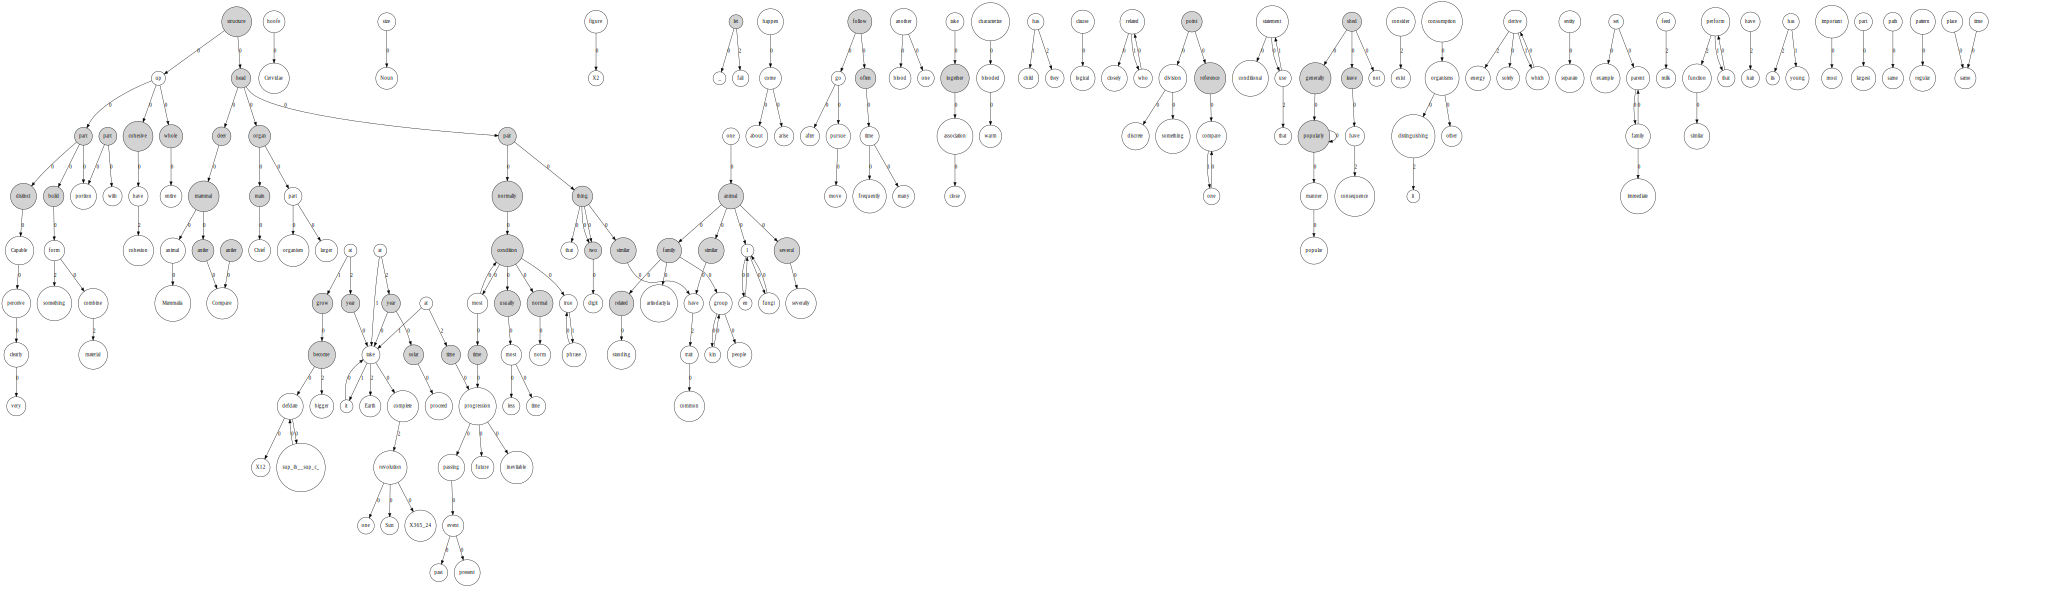

In [8]:
dot_graph_premise = premise.to_dot()
Source(dot_graph_premise)

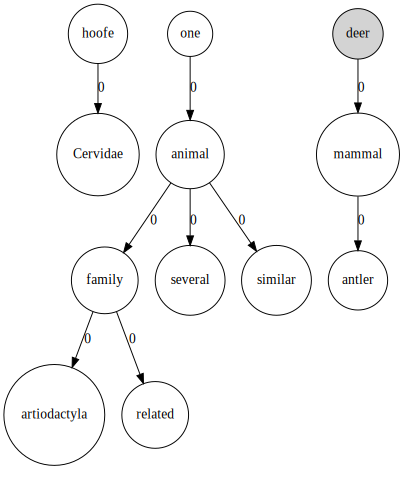

In [9]:
dot_graph_hypothesis = hyp.to_dot()
Source(dot_graph_hypothesis)

In [10]:
dot_graph_premise, dot_graph_hypothesis = compare_graphs(premise, hyp)

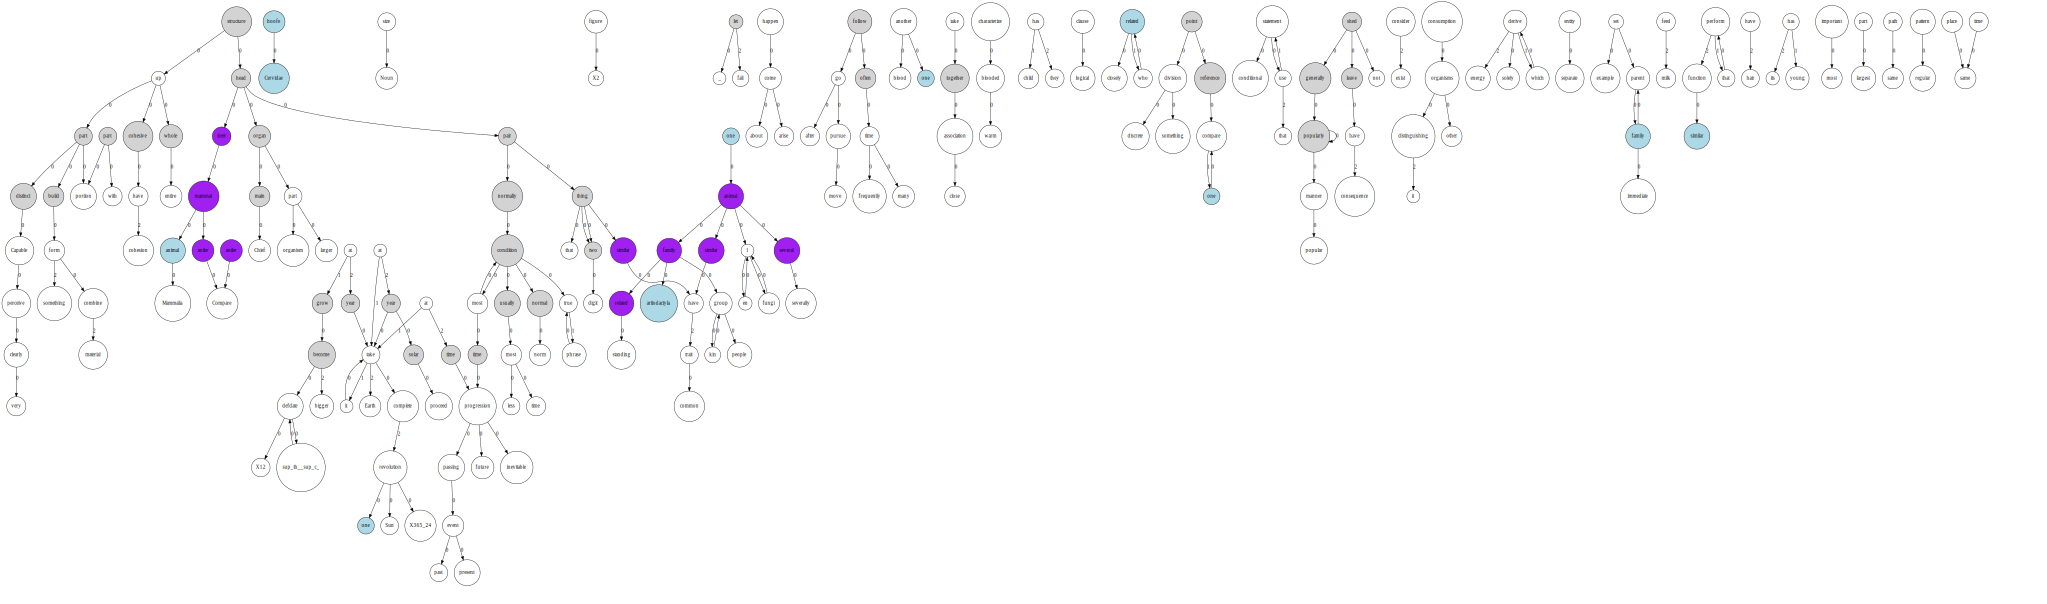

In [11]:
dot_graph_premise

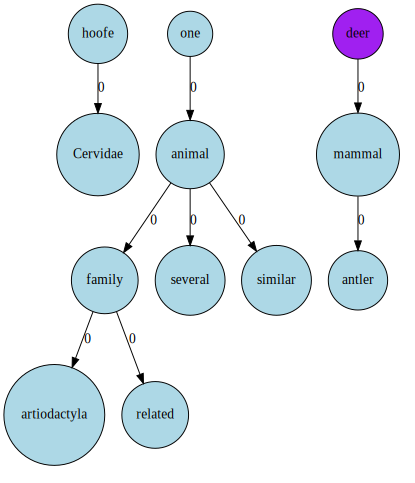

In [12]:
dot_graph_hypothesis